In [20]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


My implementation of the logistic regression algorithm (`logistic.py`) can be found [here](https://github.com/lawolff1702/lawolff1702.github.io/blob/6874e132c1512ee08a467716264a248c9d57cc77/posts/Implementing%20Logistic%20Regression/logistic.py).

# Abstract

--- insert here ---

# Implementation

The logistic regression model I implemented minimizes the binary cross-entropy loss to classify data. During training, we use momentum to help the model move more quickly in the right direction by combining the current gradient with a fraction of the previous update as we try search the loss-space for a minimum. The momentum should help reduce oscillations and speed up convergence! Lets see how it works!

The code below provides functions to generate and plot data for a classification problem that we can address using our model.

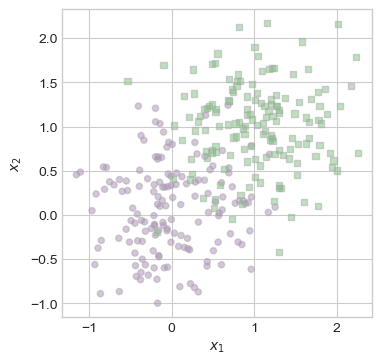

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

def plot_lr_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "PRGn", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
X, y = classification_data(noise = 0.5)
plot_lr_data(X, y, ax)

We just generated some 2d non-linearly separable data, now lets train our model in a gradient descend loop to see how it performs!

In [42]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []
max_iter = 100

for _ in range(max_iter): 
    loss = LR.loss(X, y)
    loss_vec.append(loss)

    opt.step(X, y, alpha = 0.1, beta = 0.9)

loss

tensor(0.2360)

After 100 iterations we were able to get a pretty low loss. Lets see how the process looked like step by step.

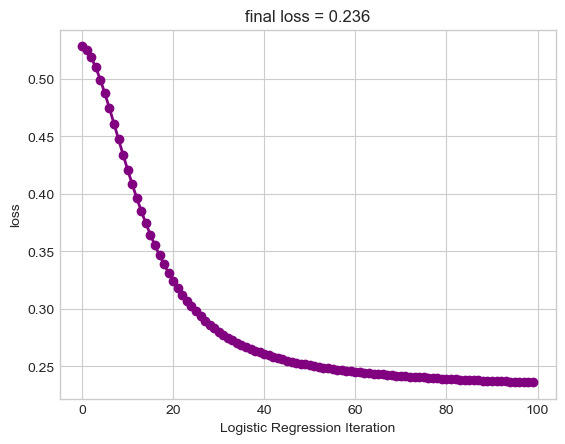

In [53]:
plt.plot(loss_vec, color = "purple", lw=2)
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "purple")
labs = plt.gca().set(xlabel = "Logistic Regression Iteration", ylabel = "loss", title = f"final loss = {loss:.3f}")

It is interesting to note that our Logistic Regression is not jumping around as we observed with the Perceptron algorithm in the [previous blog post](https://lawolff1702.github.io/posts/Implementing%20the%20Perceptron%20Algorithm/). On the contrary the momentum is helping it move in a smooth curve as it converges to a minimal loss.